In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
import warnings
warnings.filterwarnings('ignore')

In [106]:
pd.set_option('display.max.columns', 41)

In [107]:
df = pd.read_csv('Oil and Gas 1932-2014.csv')
df

,cty_name,iso3numeric,id,year,eiacty,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000_mboe,gas_price_2000,gas_price_nom,gas_value_nom,gas_value_2000,gas_value_2014,oil_gas_value_nom,oil_gas_value_2000,oil_gas_value_2014,oil_gas_valuePOP_nom,oil_gas_valuePOP_2000,oil_gas_valuePOP_2014,oil_exports,net_oil_exports,net_oil_exports_mt,net_oil_exports_value,net_oil_exports_valuePOP,gas_exports,net_gas_exports_bcf,net_gas_exports_mboe,net_gas_exports_value,net_gas_exports_valuePOP,net_oil_gas_exports_valuePOP,population,pop_maddison,sovereign,mult_nom_2000,mult_nom_2014,mult_2000_2014
0,Afghanistan,4,AFG,1932,Afghanistan,NaN,10.860860,0.870000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.599874,17.321973,1.374774
1,Afghanistan,4,AFG,1933,Afghanistan,NaN,8.815239,0.670000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,13.280064,18.257080,1.374774
2,Afghanistan,4,AFG,1934,Afghanistan,NaN,12.715790,1.000000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.853008,17.669975,1.374774
3,Afghanistan,4,AFG,1935,Afghanistan,NaN,12.039690,0.970000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.537882,17.236748,1.374774
4,Afghanistan,4,AFG,1936,Afghanistan,NaN,13.383210,1.090000,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.060000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,12.420786,17.075768,1.374774
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15516,Zimbabwe,716,ZWE,2010,Zimbabwe,0.0,62.778052,79.495534,0.0,0.0,0.0,0.0,1.915340e+07,3.537880,4.480000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12571454.0,NaN,1,0.789705,1.085666,1.374774
15517,Zimbabwe,716,ZWE,2011,Zimbabwe,0.0,85.170708,111.255598,0.0,0.0,0.0,0.0,1.637074e+07,3.023886,3.950000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12754378.0,NaN,1,0.765541,1.052445,1.374774
15518,Zimbabwe,716,ZWE,2012,Zimbabwe,0.0,83.754465,111.669702,0.0,0.0,0.0,0.0,1.080083e+07,1.995052,2.660000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,13724317.0,NaN,1,0.750020,1.031107,1.374774
15519,Zimbabwe,716,ZWE,2013,Zimbabwe,0.0,80.319530,108.658518,0.0,0.0,0.0,0.0,1.483600e+07,2.740400,3.707290,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,14149648.0,NaN,1,0.739192,1.016222,1.374774


# 2. Предобработка данных

## 2.1 Выбор основных атрибутов

In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   cty_name                      15521 non-null  object 
 1   iso3numeric                   15521 non-null  int64  
 2   id                            15106 non-null  object 
 3   year                          15521 non-null  int64  
 4   eiacty                        14254 non-null  object 
 5   oil_prod32_14                 10103 non-null  float64
 6   oil_price_2000                15503 non-null  float64
 7   oil_price_nom                 15521 non-null  float64
 8   oil_value_nom                 10103 non-null  float64
 9   oil_value_2000                10103 non-null  float64
 10  oil_value_2014                10103 non-null  float64
 11  gas_prod55_14                 8812 non-null   float64
 12  gas_price_2000_mboe           15521 non-null  float64
 13  g

In [109]:
df_num = df.select_dtypes(['int', 'float'])
df_to_fact = df.select_dtypes('object')
df_to_fact = df_to_fact.apply(lambda x: pd.factorize(x)[0])
df_num = pd.concat([df_num, df_to_fact], axis=1)
df_num.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15521 entries, 0 to 15520
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   iso3numeric                   15521 non-null  int64  
 1   year                          15521 non-null  int64  
 2   oil_prod32_14                 10103 non-null  float64
 3   oil_price_2000                15503 non-null  float64
 4   oil_price_nom                 15521 non-null  float64
 5   oil_value_nom                 10103 non-null  float64
 6   oil_value_2000                10103 non-null  float64
 7   oil_value_2014                10103 non-null  float64
 8   gas_prod55_14                 8812 non-null   float64
 9   gas_price_2000_mboe           15521 non-null  float64
 10  gas_price_2000                11220 non-null  float64
 11  gas_price_nom                 15521 non-null  float64
 12  gas_value_nom                 8812 non-null   float64
 13  g

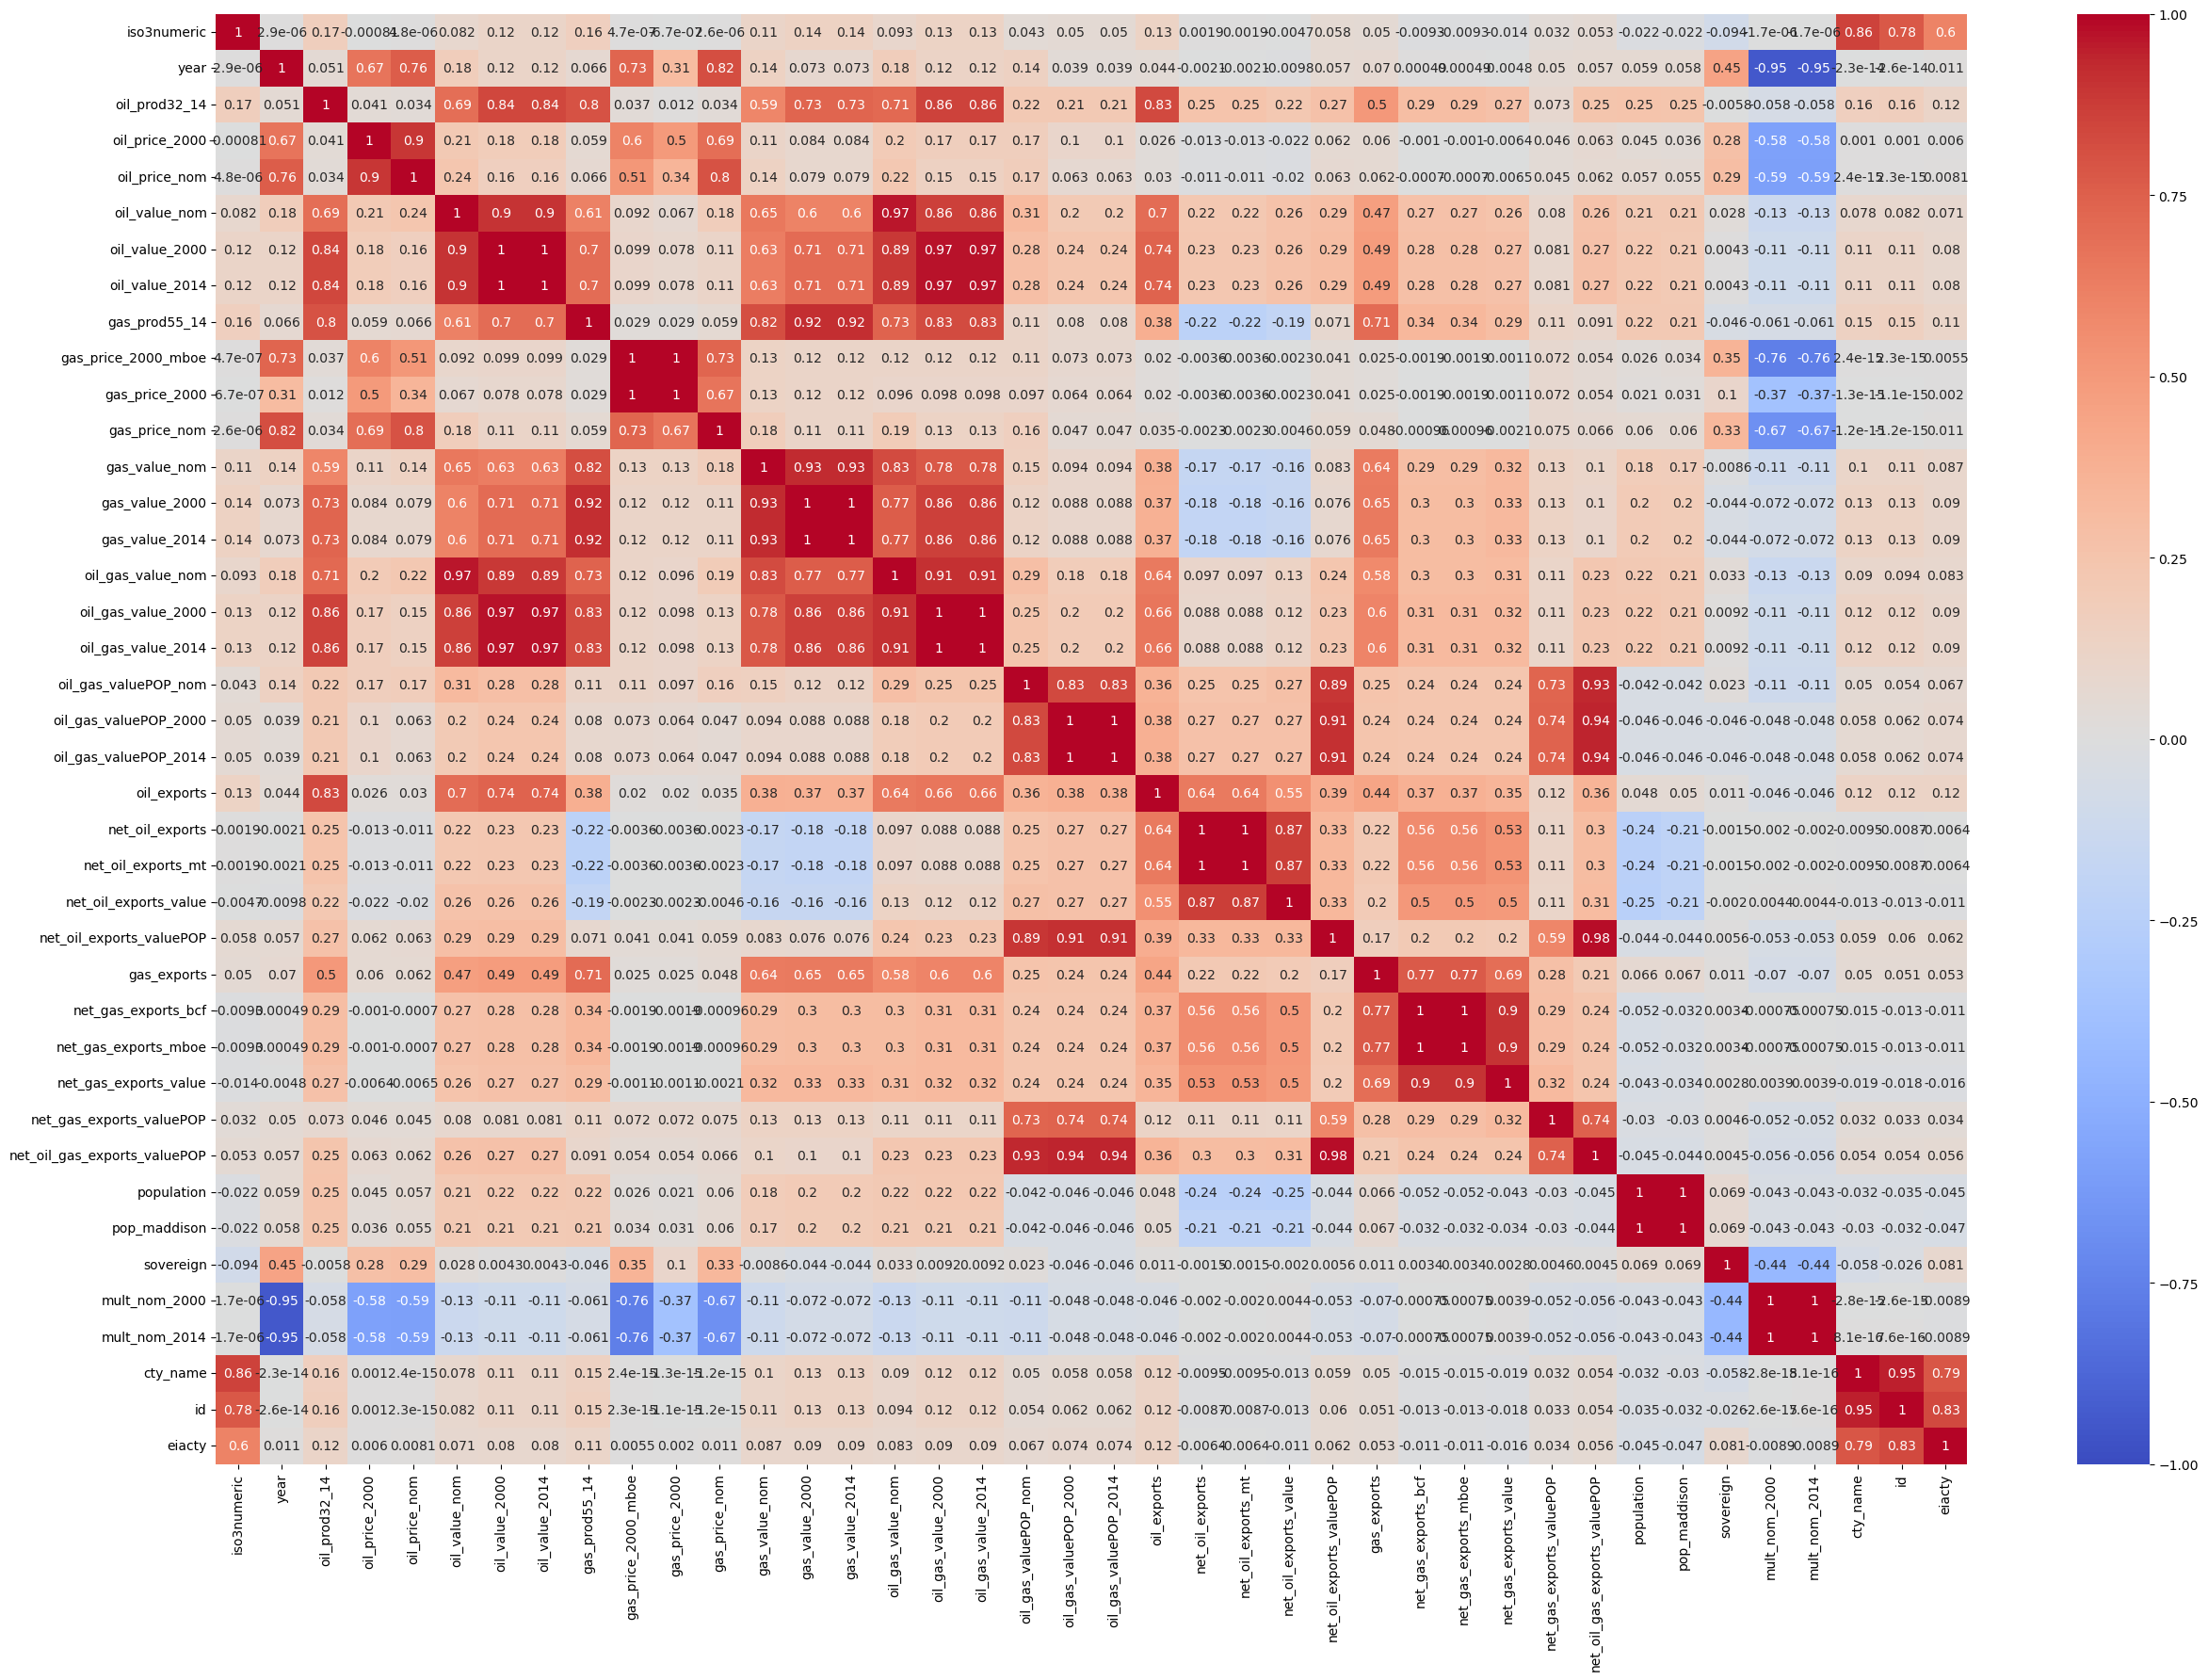

In [110]:
plt.figure(figsize=(30,20))
sns.heatmap(df_num.drop(columns="mult_2000_2014").corr(), cmap='coolwarm', vmin=-1, vmax=1, center=0, annot=True)
plt.show()

In [111]:
df.columns

Index(['cty_name', 'iso3numeric', 'id', 'year', 'eiacty', 'oil_prod32_14',
       'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
       'oil_value_2014', 'gas_prod55_14', 'gas_price_2000_mboe',
       'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
       'gas_value_2014', 'oil_gas_value_nom', 'oil_gas_value_2000',
       'oil_gas_value_2014', 'oil_gas_valuePOP_nom', 'oil_gas_valuePOP_2000',
       'oil_gas_valuePOP_2014', 'oil_exports', 'net_oil_exports',
       'net_oil_exports_mt', 'net_oil_exports_value',
       'net_oil_exports_valuePOP', 'gas_exports', 'net_gas_exports_bcf',
       'net_gas_exports_mboe', 'net_gas_exports_value',
       'net_gas_exports_valuePOP', 'net_oil_gas_exports_valuePOP',
       'population', 'pop_maddison', 'sovereign', 'mult_nom_2000',
       'mult_nom_2014', 'mult_2000_2014'],
      dtype='object')

In [112]:
df = df[['cty_name', 'year', 'oil_prod32_14', 'oil_price_2000', 'oil_price_nom', 'oil_value_nom', 'oil_value_2000',
        'oil_value_2014', 'gas_prod55_14', 'gas_price_2000', 'gas_price_nom', 'gas_value_nom', 'gas_value_2000',
        'gas_value_2014', 'oil_exports', 'gas_exports']]

## 2.2 Устранение дубликатоы

In [113]:
df[df.duplicated]

,cty_name,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000,gas_price_nom,gas_value_nom,gas_value_2000,gas_value_2014,oil_exports,gas_exports


## 2.3 Обработка пропущенных значений

<Axes: >

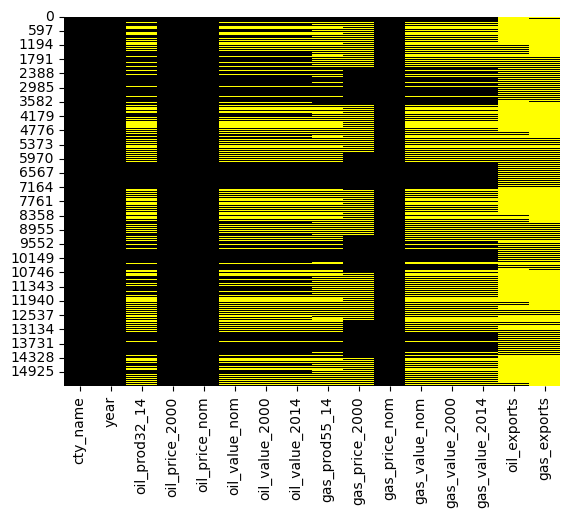

In [114]:
colors = ['black', 'yellow']
sns.heatmap(df.isnull(), cmap=sns.color_palette(colors), cbar=False)

In [115]:
num = 9
df = df[df.isnull().sum(axis=1) <= num]

### Определим критические значения

In [116]:
threshold = 0.5
bad_columns = df.isnull().mean()[df.isnull().mean() > threshold]
if not bad_columns.empty:
    print('Атрибуты с критическим значениями:')
    print(bad_columns)

Атрибуты с критическим значениями:
oil_exports    0.559613
gas_exports    0.607656
dtype: float64


In [117]:
df = df.drop(columns=bad_columns.index)

### Оценим погрешность при допустимом количестве пропущенныз значений

In [118]:
df.isnull().mean() * 100

cty_name           0.000000
year               0.000000
oil_prod32_14      1.347525
oil_price_2000     0.000000
oil_price_nom      0.000000
oil_value_nom      1.347525
oil_value_2000     1.347525
oil_value_2014     1.347525
gas_prod55_14     13.953715
gas_price_2000     9.471731
gas_price_nom      0.000000
gas_value_nom     13.953715
gas_value_2000    13.953715
gas_value_2014    13.953715
dtype: float64

In [119]:
df.describe()

,year,oil_prod32_14,oil_price_2000,oil_price_nom,oil_value_nom,oil_value_2000,oil_value_2014,gas_prod55_14,gas_price_2000,gas_price_nom,gas_value_nom,gas_value_2000,gas_value_2014
count,10241.000000,1.010300e+04,10241.000000,10241.000000,1.010300e+04,1.010300e+04,1.010300e+04,8812.000000,9271.000000,10241.000000,8.812000e+03,8.812000e+03,8.812000e+03
mean,1983.055073,1.834108e+07,31.925306,26.451012,4.049737e+09,4.777023e+09,6.567325e+09,100.702009,3.674263,1.989594,1.796270e+09,2.130068e+09,2.928361e+09
std,20.149478,6.384938e+07,22.915642,30.277242,2.017801e+10,2.100122e+10,2.887193e+10,462.242415,1.514179,1.975946,9.897255e+09,1.074332e+10,1.476963e+10
min,1932.000000,0.000000e+00,7.879107,0.670000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,1.995052,0.050000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1969.000000,0.000000e+00,12.247720,1.930000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2.652353,0.170000,0.000000e+00,0.000000e+00,0.000000e+00
50%,1985.000000,4.980000e+04,23.698000,17.970078,2.064857e+06,7.171990e+06,9.859862e+06,0.000000,3.066430,1.690000,0.000000e+00,0.000000e+00,0.000000e+00
75%,2000.000000,4.025170e+06,45.818440,31.610000,3.808598e+08,6.935786e+08,9.535135e+08,21.684397,4.249008,2.660000,2.331281e+08,4.045937e+08,5.562246e+08
max,2014.000000,6.160000e+08,85.170708,111.669702,4.044369e+11,3.401958e+11,4.676922e+11,5605.121816,9.009039,7.960000,2.445348e+11,2.156113e+11,2.964167e+11


### Заменим пустые значения на значения полученный с помощью IterationImputer

In [120]:
df_impute = df[['oil_prod32_14', 'oil_value_nom', 'oil_value_2000', 'oil_value_2014', 'gas_prod55_14', 'gas_value_nom', 'gas_price_2000',
               'gas_value_2000', 'gas_value_2014']].copy()

imputer = IterativeImputer(max_iter=1, tol=0.0001)
df_imputer = pd.DataFrame(imputer.fit_transform(df_impute), index=df_impute.index, columns=df_impute.columns)

for i in df_imputer.columns:
    df[i] = df_imputer[i]

In [121]:
df.isnull().sum()

cty_name          0
year              0
oil_prod32_14     0
oil_price_2000    0
oil_price_nom     0
oil_value_nom     0
oil_value_2000    0
oil_value_2014    0
gas_prod55_14     0
gas_price_2000    0
gas_price_nom     0
gas_value_nom     0
gas_value_2000    0
gas_value_2014    0
dtype: int64

## 2.4 Обработка аномалий и ошибок

In [122]:
mean_oil_value = df[df['oil_value_2000'] > 0]['oil_value_2000'].mean()
df.loc[df['oil_value_2000'] <= 0, 'oil_value_2000'] = mean_oil_value


In [123]:
mean_oil_value_2 = df[df['oil_value_2014'] > 0]['oil_value_2014'].mean()
df.loc[df['oil_value_2014'] <= 0, 'oil_value_2014'] = mean_oil_value_2

In [124]:
df_num = df.select_dtypes(['float64', 'int'])

In [125]:
df_std = pd.DataFrame()
for i in df_num.columns:
    m = df_num[i].mean()
    s = df_num[i].std()
    df_std[i+'_n'] = (df_num[i] - m) / s

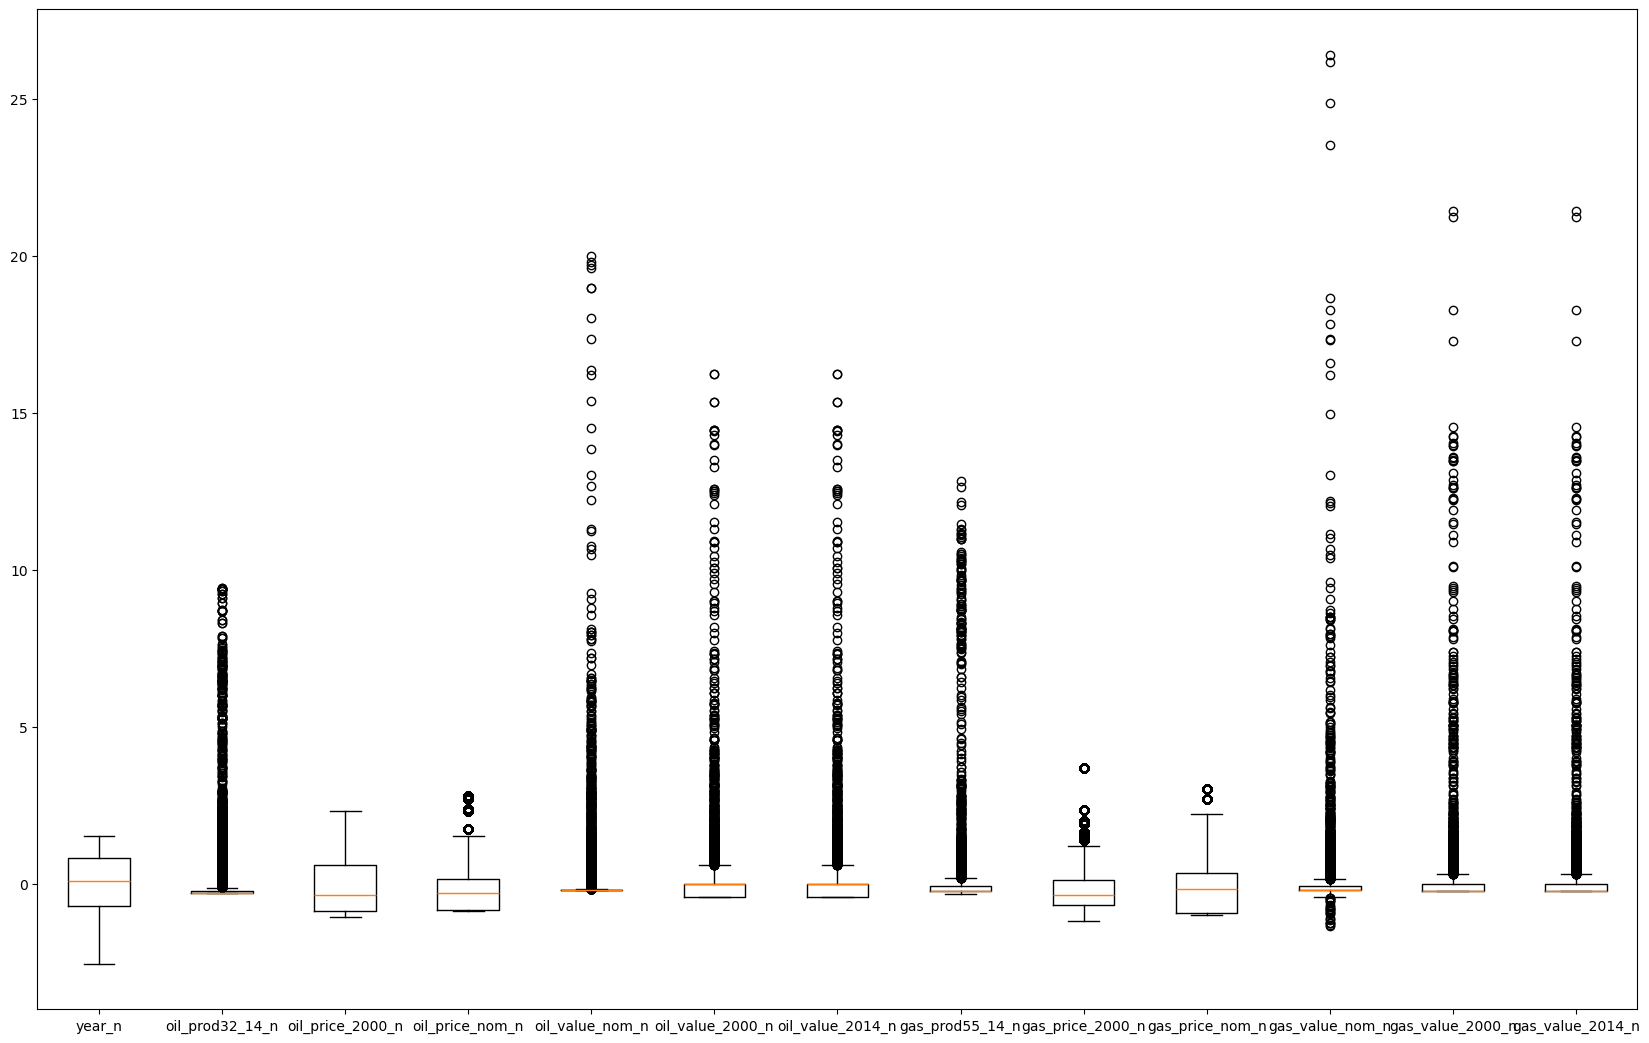

In [126]:
fig = plt.figure(figsize=(16, 10))
ax = fig.add_axes([0, 0, 1, 1])
ax.set_xticklabels(df_std.columns)

bp = ax.boxplot(df_std, widths=0.5)
plt.show()

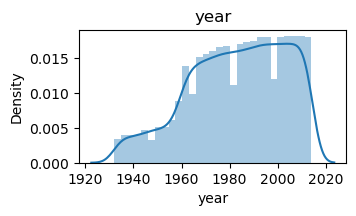

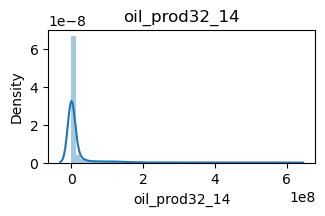

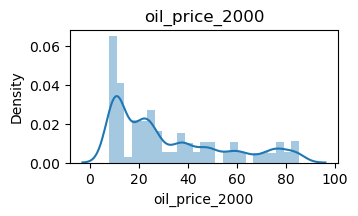

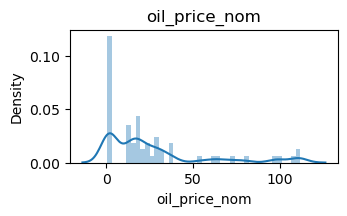

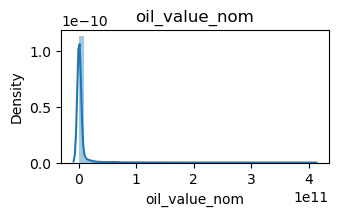

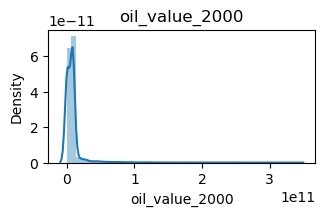

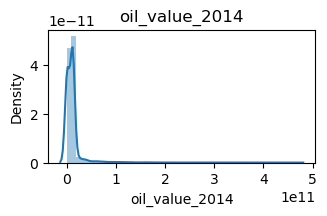

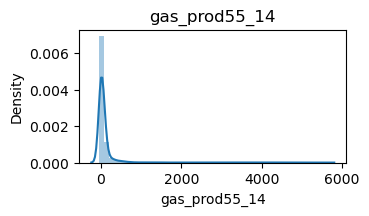

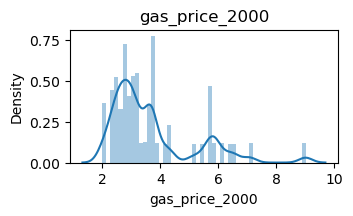

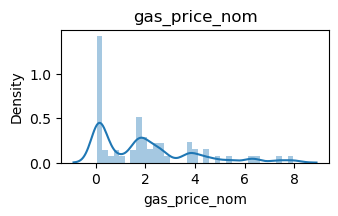

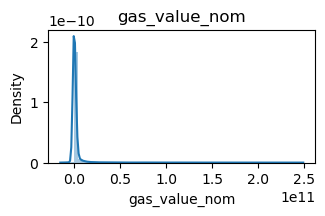

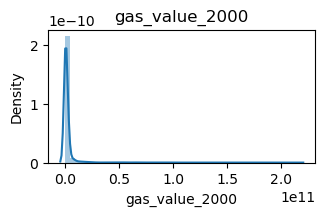

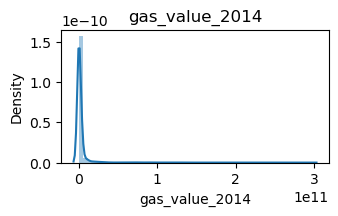

In [127]:
count = 1
for i in list(df_num.columns):
    plt.figure(figsize=(20, 10))
    plt.subplot(5, 5, count)
    sns.distplot(df_num[i])
    plt.title(i)
    count += 1

plt.show()

In [128]:
df.to_csv('data.csv', index=False)